In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# import ffotime (without spesis)

df = '/mimic-iv-2.2'
def read_ffotime(df):
    ffo = pd.read_csv('ffotime.csv.gz')

    return ffo

ffo = read_ffotime(df)
ffo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20992361 entries, 0 to 20992360
Data columns (total 27 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Unnamed: 0     int64 
 1   subject_id     int64 
 2   hadm_id        int64 
 3   recode         int64 
 4   race           object
 5   gender         object
 6   anchor_age     int64 
 7   blood          int64 
 8   circulatory    int64 
 9   congenital     int64 
 10  digestive      int64 
 11  endocrine      int64 
 12  genitourinary  int64 
 13  infectious     int64 
 14  injury         int64 
 15  mental         int64 
 16  misc           int64 
 17  muscular       int64 
 18  neoplasms      int64 
 19  nervous        int64 
 20  pregnancy      int64 
 21  prenatal       int64 
 22  respiratory    int64 
 23  skin           int64 
 24  systolic       int64 
 25  diastolic      int64 
 26  starttime      object
dtypes: int64(24), object(3)
memory usage: 4.2+ GB


In [3]:
ffo_n = ffo.head(1000000)

In [4]:
# import fstime (spesis)

def read_fstime(df):
    fs = pd.read_csv('fstime.csv.gz')

    return fs

fs = read_fstime(df)


In [5]:
fs_n = fs.drop(columns=['Unnamed: 0.1'])
fs_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003001 entries, 0 to 3003000
Data columns (total 27 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Unnamed: 0     int64 
 1   subject_id     int64 
 2   hadm_id        int64 
 3   recode         int64 
 4   race           object
 5   gender         object
 6   anchor_age     int64 
 7   blood          int64 
 8   circulatory    int64 
 9   congenital     int64 
 10  digestive      int64 
 11  endocrine      int64 
 12  genitourinary  int64 
 13  infectious     int64 
 14  injury         int64 
 15  mental         int64 
 16  misc           int64 
 17  muscular       int64 
 18  neoplasms      int64 
 19  nervous        int64 
 20  pregnancy      int64 
 21  prenatal       int64 
 22  respiratory    int64 
 23  skin           int64 
 24  systolic       int64 
 25  diastolic      int64 
 26  starttime      object
dtypes: int64(24), object(3)
memory usage: 618.6+ MB


In [6]:
fs_n.recode.value_counts()

995    3003001
Name: recode, dtype: int64

In [7]:
# import lab

def read_lab(df):
    lab = pd.read_csv('lab_pivot.csv.gz')

    return lab

lab = read_lab(df)


In [8]:
lab_n = lab.sample(n = 100000)

In [9]:
# merge ffo and fs

baseline = pd.concat([ffo_n, fs_n])
baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4003001 entries, 0 to 3003000
Data columns (total 27 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Unnamed: 0     int64 
 1   subject_id     int64 
 2   hadm_id        int64 
 3   recode         int64 
 4   race           object
 5   gender         object
 6   anchor_age     int64 
 7   blood          int64 
 8   circulatory    int64 
 9   congenital     int64 
 10  digestive      int64 
 11  endocrine      int64 
 12  genitourinary  int64 
 13  infectious     int64 
 14  injury         int64 
 15  mental         int64 
 16  misc           int64 
 17  muscular       int64 
 18  neoplasms      int64 
 19  nervous        int64 
 20  pregnancy      int64 
 21  prenatal       int64 
 22  respiratory    int64 
 23  skin           int64 
 24  systolic       int64 
 25  diastolic      int64 
 26  starttime      object
dtypes: int64(24), object(3)
memory usage: 855.1+ MB


In [ ]:
baseline.to_csv('ffofs.csv.gz')

In [10]:
base_n = baseline.drop(columns=['Unnamed: 0','hadm_id','race'])
base_nn = baseline.sample(n = 100000)

In [11]:
base_lab = pd.merge(base_nn, lab_n, how='outer', on='subject_id')

base_lab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432603 entries, 0 to 432602
Data columns (total 48 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         332627 non-null  float64
 1   subject_id         432603 non-null  int64  
 2   hadm_id            332627 non-null  float64
 3   recode             332627 non-null  float64
 4   race               332627 non-null  object 
 5   gender             332627 non-null  object 
 6   anchor_age         332627 non-null  float64
 7   blood              332627 non-null  float64
 8   circulatory        332627 non-null  float64
 9   congenital         332627 non-null  float64
 10  digestive          332627 non-null  float64
 11  endocrine          332627 non-null  float64
 12  genitourinary      332627 non-null  float64
 13  infectious         332627 non-null  float64
 14  injury             332627 non-null  float64
 15  mental             332627 non-null  float64
 16  mi

In [13]:
base_lab.recode.value_counts()

995.0    282328
584.0     41478
311.0      8684
276.0       137
Name: recode, dtype: int64

# Feature from lab

In [14]:
base_lab['gender'].replace({'M': 0, 'F':1}, inplace=True)

base_lab.head()

,Unnamed: 0,subject_id,hadm_id,recode,race,gender,anchor_age,blood,circulatory,congenital,...,Urea Nitrogen,Bands,Hematocrit,Hemoglobin,INR(PT),Platelet Count,PT,PTT,WBC Count,White Blood Cells
0,1149.0,10274866,23488422.0,995.0,HISPANIC/LATINO,0.0,65.0,0.0,1.0,0.0,...,NaN,NaN,37.2,12.0,NaN,239.0,NaN,NaN,NaN,7.6
1,1149.0,10274866,23488422.0,995.0,HISPANIC/LATINO,0.0,65.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63.0,10274866,23488422.0,995.0,HISPANIC/LATINO,0.0,65.0,0.0,1.0,0.0,...,NaN,NaN,37.2,12.0,NaN,239.0,NaN,NaN,NaN,7.6
3,63.0,10274866,23488422.0,995.0,HISPANIC/LATINO,0.0,65.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,345.0,10274866,23488422.0,995.0,HISPANIC/LATINO,0.0,65.0,0.0,1.0,0.0,...,NaN,NaN,37.2,12.0,NaN,239.0,NaN,NaN,NaN,7.6


In [15]:
base_lab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432603 entries, 0 to 432602
Data columns (total 48 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         332627 non-null  float64
 1   subject_id         432603 non-null  int64  
 2   hadm_id            332627 non-null  float64
 3   recode             332627 non-null  float64
 4   race               332627 non-null  object 
 5   gender             332627 non-null  float64
 6   anchor_age         332627 non-null  float64
 7   blood              332627 non-null  float64
 8   circulatory        332627 non-null  float64
 9   congenital         332627 non-null  float64
 10  digestive          332627 non-null  float64
 11  endocrine          332627 non-null  float64
 12  genitourinary      332627 non-null  float64
 13  infectious         332627 non-null  float64
 14  injury             332627 non-null  float64
 15  mental             332627 non-null  float64
 16  mi

In [16]:
def replace_recode_range(value):
    if value == 995:
        return 1
    else:
        return 0

base_lab['recode'] = base_lab['recode'].apply(replace_recode_range)

base_lab.recode.value_counts()

1    282328
0    150275
Name: recode, dtype: int64

Text(0.5, 1.0, 'Age versus Diagnoses')

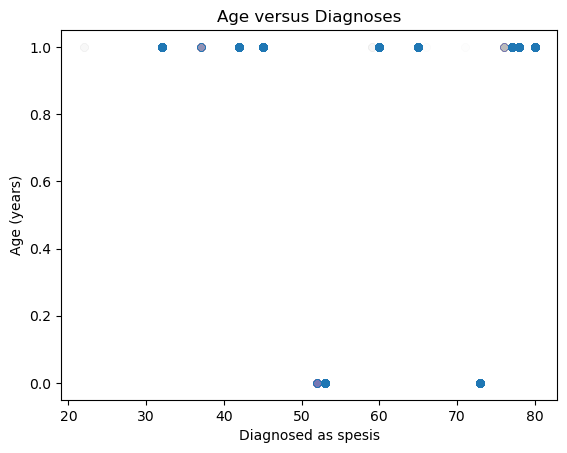

In [17]:
plt.scatter(base_lab['anchor_age'], base_lab['recode'], alpha=0.005)
plt.xlabel('Diagnosed as spesis')
plt.ylabel('Age (years)')
plt.title('Age versus Diagnoses')

In [210]:
bala = base_lab.drop(columns = ['Unnamed: 0','hadm_id','race','anchor_age','charttime'])
bala

,subject_id,recode,gender,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,...,Urea Nitrogen,Bands,Hematocrit,Hemoglobin,INR(PT),Platelet Count,PT,PTT,WBC Count,White Blood Cells
0,10274866,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,37.2,12.0,NaN,239.0,NaN,NaN,NaN,7.6
1,10274866,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10274866,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,37.2,12.0,NaN,239.0,NaN,NaN,NaN,7.6
3,10274866,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10274866,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,37.2,12.0,NaN,239.0,NaN,NaN,NaN,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432598,19393286,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432599,12304028,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,NaN,41.9,14.0,1.0,243.0,10.6,32.3,NaN,5.0
432600,18179783,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,NaN,36.4,11.7,1.1,197.0,11.5,33.0,NaN,4.7
432601,12423170,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
# fill the null value with 0, because if it's null, maybe the physicians don't think the patients need such biomedical test

bala = bala.fillna (0)

In [212]:
bala ['starttime'] = pd.to_datetime (bala ['starttime'])

In [213]:
#group by subject_id and calculate the minimum datetime for each group

min_starttime = bala.groupby ('subject_id') ['starttime'].min ()

bala = bala.join (min_starttime, on='subject_id', rsuffix='_min')
bala ['time'] = bala ['starttime'] - bala ['starttime_min']

In [214]:
bala.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432603 entries, 0 to 432602
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   subject_id         432603 non-null  int64          
 1   recode             432603 non-null  int64          
 2   gender             432603 non-null  float64        
 3   blood              432603 non-null  float64        
 4   circulatory        432603 non-null  float64        
 5   congenital         432603 non-null  float64        
 6   digestive          432603 non-null  float64        
 7   endocrine          432603 non-null  float64        
 8   genitourinary      432603 non-null  float64        
 9   infectious         432603 non-null  float64        
 10  injury             432603 non-null  float64        
 11  mental             432603 non-null  float64        
 12  misc               432603 non-null  float64        
 13  muscular           432603 non

In [215]:
bala = bala.drop(columns = ['starttime','starttime_min','subject_id'])
bala['recode'] = bala['recode'].astype(float)
recode = bala['recode'].values


In [248]:
bala_n = bala.sample(n = 400000)

In [249]:
bala_n.time.value_counts(sort=True, ascending=False)

0 days 00:00:00       97027
614 days 21:00:00      5298
792 days 12:00:00      5154
64 days 11:00:00       5108
127 days 09:00:00      5069
                      ...  
52 days 19:00:00          1
976 days 04:00:00         1
977 days 04:00:00         1
1472 days 18:00:00        1
52 days 12:00:00          1
Name: time, Length: 1293, dtype: int64

In [250]:

max_time = pd.Timedelta ('0 days 04:00:00')
#filter the DataFrame where diff column is less than or equal to max_time
filtered_t = bala_n [bala_n ['time'] <= max_time]

In [251]:
filtered_t.time.value_counts()

0 days 00:00:00    97027
0 days 01:00:00     1677
0 days 03:00:00      793
0 days 02:00:00      642
0 days 04:00:00        5
Name: time, dtype: int64

# predict the event 1 hour ahead

In [252]:
one_hour = pd.Timedelta ('0 days 01:00:00')
filtered_t = filtered_t [filtered_t ['time'] == one_hour]
filtered_t = filtered_t.drop(columns = ['time'])

In [253]:
features_1 = filtered_t.drop(columns = ['recode'])
recode_1 = filtered_t.recode

In [254]:
from sklearn.model_selection import train_test_split

# spliting the dataset into 20% test set and 80% train set
X_train, X_test, y_train, y_test = train_test_split(features_1, 
                                                     recode_1,
                                                    test_size = .20, 
                                                    random_state = 0)


print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1341 samples.
Testing set has 336 samples.


In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_estimators=40, max_features='sqrt')
clf = clf.fit(X_train, y_train)

In [256]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<AxesSubplot:ylabel='feature'>

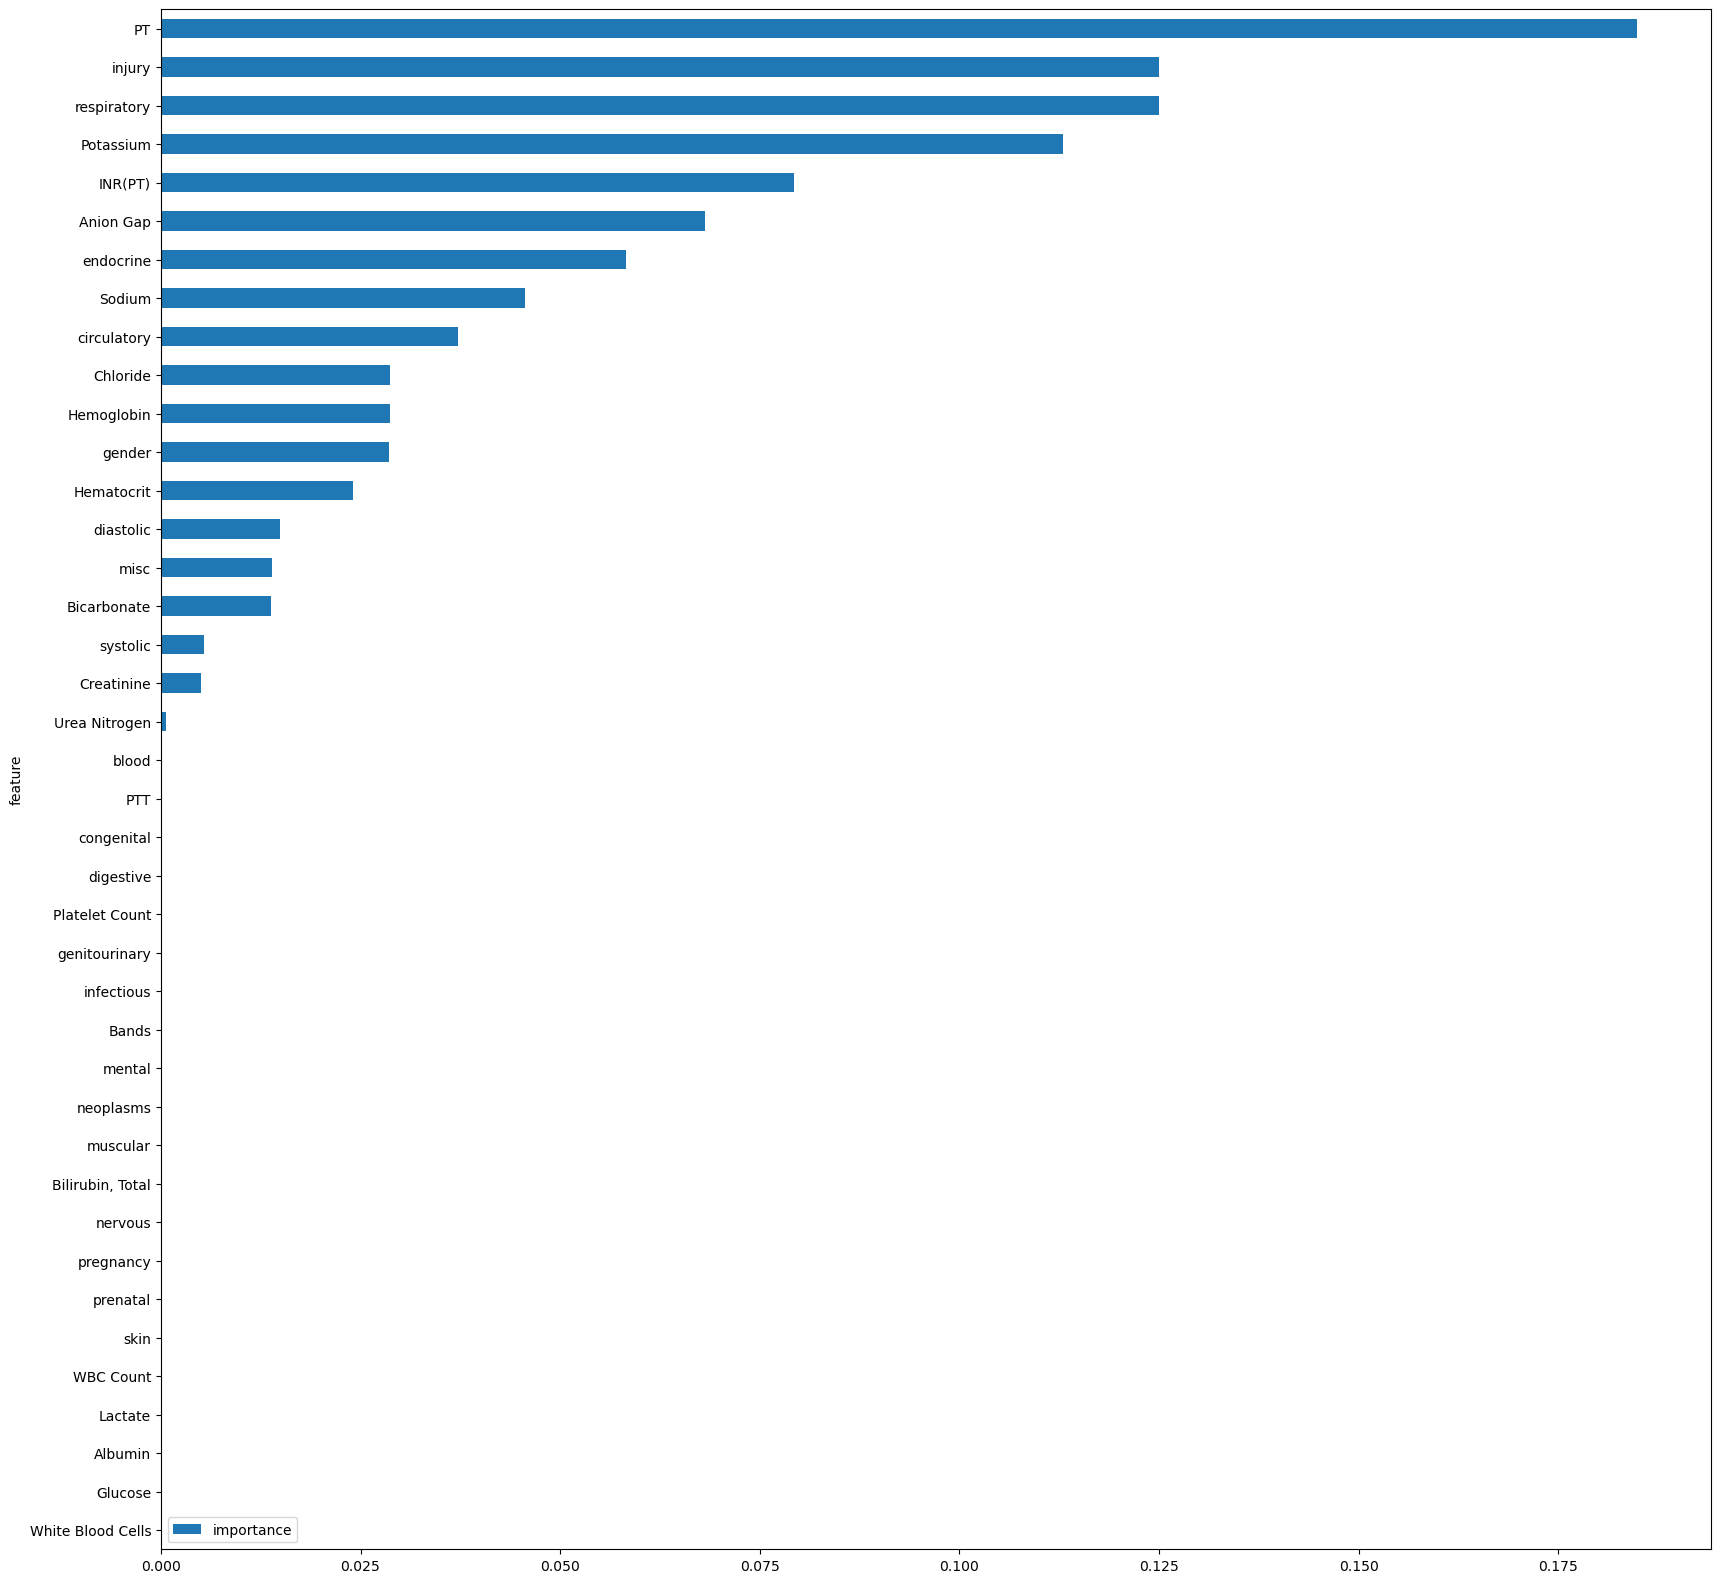

In [257]:
features.plot(kind='barh', figsize=(20, 20))

In [258]:
from sklearn.linear_model import LogisticRegression

# Logistic regression with tuned paramter C = 0.003
clf=LogisticRegression(C = 0.003, penalty = 'l2', random_state = 42)
clf.fit(X_train, y_train)

model = clf
y_train_preds = model.predict_proba(X_train)[:,1]
y_test_preds = model.predict_proba(X_test)[:,1]
print(y_train[:10])
print(y_train_preds[:10])

clf=LogisticRegression(C = 0.003, penalty = 'l2', random_state = 42)
clf.fit(X_train, y_train)
model = clf

204124    1.0
235432    1.0
181235    1.0
11294     1.0
5292      1.0
98395     1.0
235436    1.0
151261    1.0
7785      1.0
10946     1.0
Name: recode, dtype: float64
[0.99992999 0.99990648 0.9989333  0.99999992 0.99999989 0.99997546
 0.99999617 0.9981529  0.99871357 0.99999997]


Feature: 0, Score: -0.00200
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00628
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00635
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00649
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.00353
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00007
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: -0.00649
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.07332
Feature: 19, Score: 0.02318
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: -0.02387
Feature: 23, Score: -0.03764
Feature: 24, Score: 0.00027
Feature: 25, Score: -0.00672
Feature: 26, Score: 0.00449
Feature: 27, Score: 0.02692
Feature: 28, Score: -0.01266
Feature: 29, Score: 0.02233
Feature: 30, Score: -0.04817
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.01907
Feature: 33, Score: 0.00677
Feature: 34, Score: -0.01207
Feature: 35, Score: 

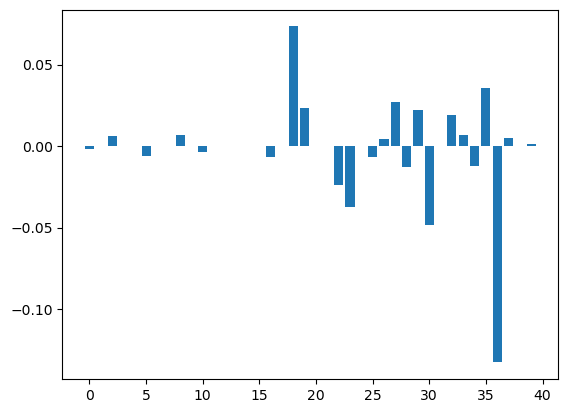

In [259]:
from matplotlib import pyplot

# get importance
importance = model.coef_[0]

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance with a bar chart
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [261]:
# feature could strongly predict onset event 1 hour ahead
print(features_1.columns[36])

PT


# predict the event 2 hour ahead

In [262]:

max_time = pd.Timedelta ('0 days 04:00:00')
#filter the DataFrame where diff column is less than or equal to max_time
filtered_t = bala_n [bala_n ['time'] <= max_time]

In [263]:
two_hour = pd.Timedelta ('0 days 02:00:00')
filtered_t = filtered_t [filtered_t ['time'] == two_hour]
filtered_t = filtered_t.drop(columns = ['time'])

In [264]:
features_2 = filtered_t.drop(columns = ['recode'])
recode_2 = filtered_t.recode

In [265]:
from sklearn.model_selection import train_test_split

# spliting the dataset into 20% test set and 80% train set
X_train, X_test, y_train, y_test = train_test_split(features_2, 
                                                     recode_2,
                                                    test_size = .20, 
                                                    random_state = 0)


print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 513 samples.
Testing set has 129 samples.


In [266]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_estimators=40, max_features='sqrt')
clf = clf.fit(X_train, y_train)

In [267]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<AxesSubplot:ylabel='feature'>

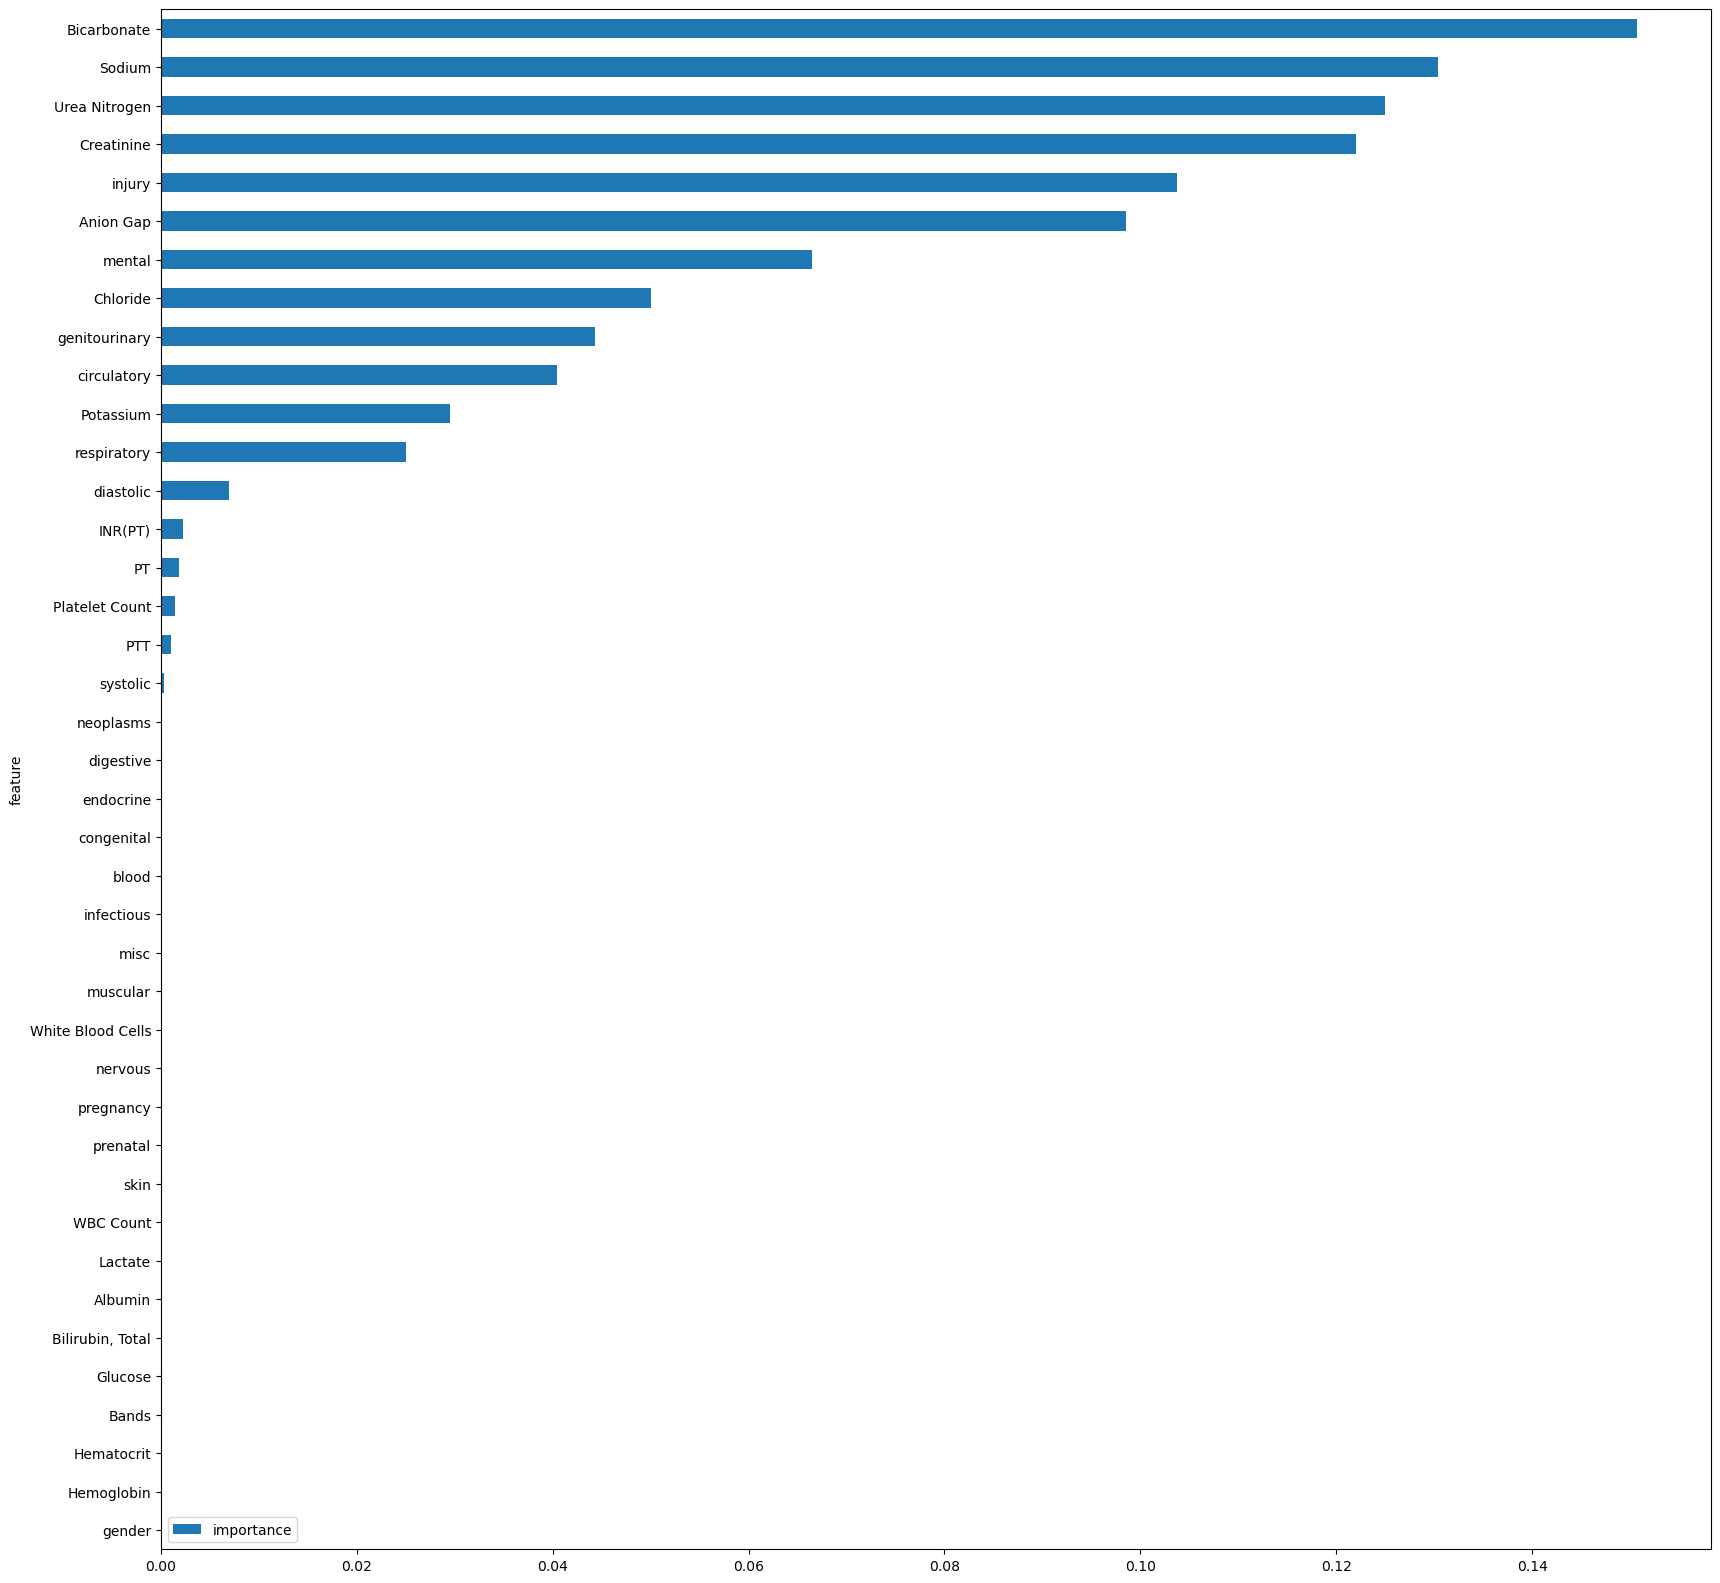

In [268]:
features.plot(kind='barh', figsize=(20, 20))

In [269]:
from sklearn.linear_model import LogisticRegression

# Logistic regression with tuned paramter C = 0.003
clf=LogisticRegression(C = 0.003, penalty = 'l2', random_state = 42)
clf.fit(X_train, y_train)

model = clf
y_train_preds = model.predict_proba(X_train)[:,1]
y_test_preds = model.predict_proba(X_test)[:,1]
print(y_train[:10])
print(y_train_preds[:10])

clf=LogisticRegression(C = 0.003, penalty = 'l2', random_state = 42)
clf.fit(X_train, y_train)
model = clf

286157    0.0
291355    0.0
305843    0.0
319140    0.0
305777    0.0
308990    0.0
319187    0.0
306238    0.0
301568    0.0
317033    0.0
Name: recode, dtype: float64
[1.40206927e-04 1.36844522e-04 1.50768619e-04 7.45156540e-05
 1.57772901e-04 8.65121455e-05 1.42453591e-04 9.17014376e-05
 8.95789278e-05 1.48038535e-04]


Feature: 0, Score: -0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00003
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00017
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00061
Feature: 9, Score: -0.00017
Feature: 10, Score: -0.00011
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: -0.00036
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00419
Feature: 19, Score: 0.00333
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: -0.00489
Feature: 23, Score: -0.00843
Feature: 24, Score: 0.00000
Feature: 25, Score: -0.03556
Feature: 26, Score: -0.00028
Feature: 27, Score: -0.01997
Feature: 28, Score: -0.00190
Feature: 29, Score: -0.04687
Feature: 30, Score: -0.00751
Feature: 31, Score: 0.00000
Feature: 32, Score: -0.00196
Feature: 33, Score: -0.00069
Feature: 34, Score: -0.00042
Feature: 35, 

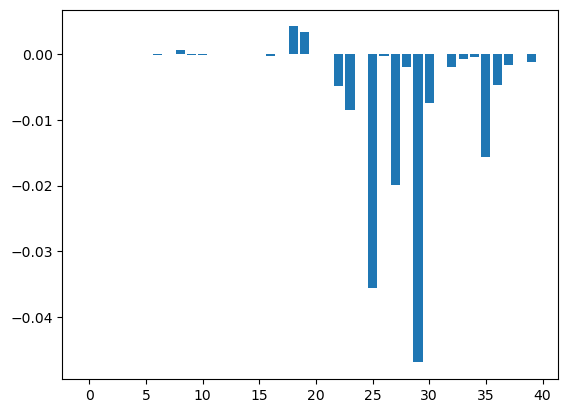

In [270]:
from matplotlib import pyplot

# get importance
importance = model.coef_[0]

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance with a bar chart
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [271]:
# feature could strongly predict onset event 2 hour ahead
print(features_2.columns[29])

Sodium


# predict the event 3 hour ahead

In [272]:

max_time = pd.Timedelta ('0 days 04:00:00')
#filter the DataFrame where diff column is less than or equal to max_time
filtered_t = bala_n [bala_n ['time'] <= max_time]

In [273]:
three_hour = pd.Timedelta ('0 days 03:00:00')
filtered_t = filtered_t [filtered_t ['time'] == three_hour]
filtered_t = filtered_t.drop(columns = ['time'])

In [274]:
features_3 = filtered_t.drop(columns = ['recode'])
recode_3 = filtered_t.recode

In [275]:
recode_3.value_counts()

1.0    793
Name: recode, dtype: int64

In [276]:
## because of the value of recode_3 is == 1.0, it means all the patients will be diagnoses as Spesis, so maybe the original data has some 
## special operations that leads to this result

## predict the event 4 hour ahead

In [277]:

max_time = pd.Timedelta ('0 days 04:00:00')
#filter the DataFrame where diff column is less than or equal to max_time
filtered_t = bala_n [bala_n ['time'] <= max_time]

In [278]:
four_hour = pd.Timedelta ('0 days 04:00:00')
filtered_t = filtered_t [filtered_t ['time'] == four_hour]
filtered_t = filtered_t.drop(columns = ['time'])

In [279]:
features_4 = filtered_t.drop(columns = ['recode'])
recode_4 = filtered_t.recode

In [280]:
recode_4.value_counts()

1.0    5
Name: recode, dtype: int64

In [281]:
## it is the same circumstance of 3 hours, the value of recode_4 is == 1.0, it means all the patients will be diagnoses as Spesis